In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.iolib.table import SimpleTable

plt.style.use('fast')
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 12,3

In [2]:
# Прочтем файл с данными
data = pd.read_excel('data.xlsx', index_col='Дата', parse_dates=['Дата'], dayfirst=True)
var = data['Значение']

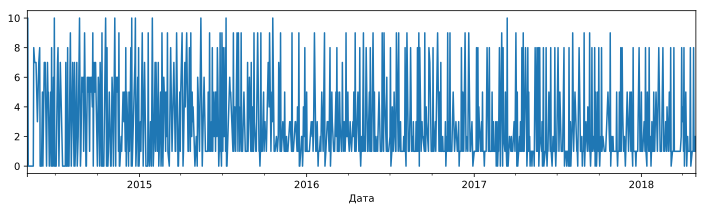

In [13]:
var.plot()
plt.show()

In [4]:
# Не очень информативно, сгладим по неделям

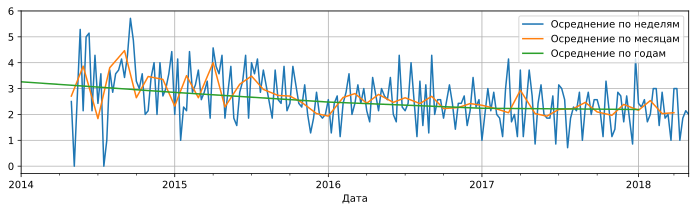

In [14]:
legend_dict=['Осреднение по неделям','Осреднение по месяцам', 'Осреднение по годам']
var.resample('W').mean().plot()
var.resample('M').mean().plot()
var.resample('Y').mean().plot()
plt.grid()
plt.legend(labels=legend_dict, loc='upper right')
plt.show()

In [6]:
# Наблюдвется тенденция к снижению

In [7]:
# Далее будем рабоать с недельной аппроксимацией
var_w = var.resample('W').mean()

In [15]:
# Для моделирования будем использовать модель ARIMA
src_data_model = var_w
model = sm.tsa.ARIMA(src_data_model, order=(1,1,1), freq='W').fit(disp=0)

In [16]:
#model.summary()

In [18]:
pred = model.predict('2018-01-07','2020-01-05', typ='levels')

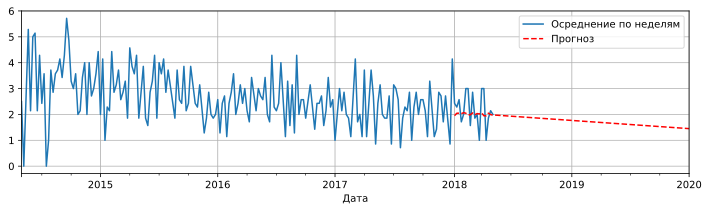

In [19]:
legend_dict=['Осреднение по неделям', 'Прогноз']
var_w.plot()
pred.plot(style='r--')
plt.grid()
plt.legend(labels=legend_dict, loc='upper right')
plt.show()